In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
titanic_df = pd.read_csv("Titanic_cleaned_data.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,0,1
1,2,1,1,0,38.0,0,0
2,3,1,3,0,26.0,0,1
3,4,1,1,0,35.0,0,1
4,5,0,3,1,35.0,0,1


In [3]:
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic_df[feature_cols]
y = titanic_df.Survived

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# fit a classification tree with max_depth=5
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)

# Fit our training data
treeclf.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [6]:
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.8523274478330658
Testing accuracy : 0.7723880597014925


In [7]:
# use crossvalidation to get avg accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

Accuracy for each fold: [0.74603175 0.79365079 0.85714286 0.87096774 0.79032258 0.75806452
 0.79032258 0.72580645 0.79032258 0.88709677]
Mean Accuracy: 0.8009728622631848


In [8]:
from sklearn.model_selection import validation_curve

# depth takes values from 1 to 10
max_depth_range = range(1, 11)

# do 10-fold cross-validation for each value in max_depth_range and return the accuracy scores. 
train_scores, valid_scores = validation_curve( treeclf, Xtrain, ytrain, param_name="max_depth", param_range=max_depth_range,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(10, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

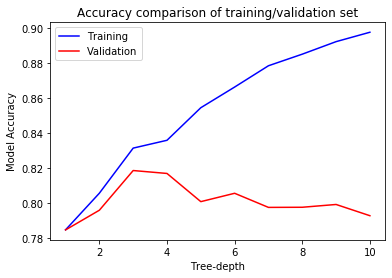

In [9]:
# Mean accuracy score for each value of max-depth
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [10]:
treeclf = DecisionTreeClassifier(max_depth=3)
treeclf.fit(Xtrain,ytrain)
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.8298555377207063
Testing accuracy : 0.8059701492537313


In [11]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=42)
rfclf.fit(Xtrain,ytrain)

print("Training accuracy: {}".format(accuracy_score(ytrain, rfclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, rfclf.predict(Xtest))))

Training accuracy: 0.8346709470304976
Testing accuracy : 0.8134328358208955


In [12]:
print(rfclf.feature_importances_)
print(feature_cols)

[0.23456692 0.56777602 0.13263483 0.01325733 0.0517649 ]
['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']


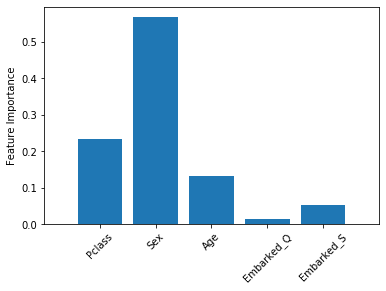

In [13]:
n = len(feature_cols)
plt.bar(range(0,n),rfclf.feature_importances_)

plt.xticks(range(0,n), feature_cols, rotation=45) # put the feature names in x-axis
plt.xlim([-1, n]) # reset the x-limits for readability
plt.ylabel("Feature Importance")
plt.show()